## 0. 背景介绍
在我们进行心理学数据和神经影像数据分析时，可能会使用到各种机器学习算法进行分类或者回归分析。使用这些算法时，我们不可能从0开始去实现和编写所有的代码。这个时候，一个好的机器学习的工具包就变得十分必要。当今在机器学习领域中，使用最为广泛，用起来最为方便的机器学习工具包当属[sklearn](http://scikit-learn.org/)。该工具包以算法丰富、接口统一（不同算法的调用方式基本相同）、使用方便著称。另外具有社群健全（问问题方便）、更新速度快、维护频繁和运行稳定等优点。**<span style="color:blue">可谓，居家出行，机器学习实践必备良器。**  

**<span style="color:red">如果你对机器学习的基本流程以及sklearn的代码实现还不了解（并很想学习），那么本教程将是为你量身打造的入门教程。一文涵盖：从数据导入、数据准备、特征选择、算法筛选、算法集成、参数调整、模型保存。15分钟时间，让你轻松掌握机器学习基本流程。**  

我将以著名的kaggle竞赛，titanic沉船问题为例，讲解机器学习一般流程和代码实现。** <span style="color:blue">本教程的workflow，只要稍加修改，就可以应用到个人的机器学习具体问题（心理学和神经影像）中。** titanic沉船问题基于titanic沉船事件数据，其核心是：探究具有什么特征的乘客可能在沉船中生还（活下来）。包括的特征有：性别，年龄等基本信息，以及船票类型，是否和伴侣和孩子一起出行等。   

**<span style="color:red">本教程要解决的关键问题：选择合适的特征和算法获得最高的分类准确率，区分哪些乘客可以生还，哪些人不能。以下7个教程分别对应着每个步骤的具体细节：
**   

1. 数据导入：[scikit-learn系列之如何导入数据](https://www.jianshu.com/p/4dfe5ce3bda9)
2. 数据准备：[scikit-learn系列之如何做数据准备](https://www.jianshu.com/p/58c7e855bd3a)
3. 特征选择：[scikit-learn系列之特征选择](https://www.jianshu.com/p/8f6f94f1d275)
4. 算法筛查：[scikit-learn系列之分类算法筛查](https://www.jianshu.com/p/61efd1842afc) [scikit-learn系列之回归算法筛查](https://www.jianshu.com/p/c3f3ab69f5ca)
5. 算法集成：[scikit-learn系列之如何做算法集成](https://www.jianshu.com/p/15a6611f1896)
6. 参数调整：[scikit-learn系列之如何调整算法参数](https://www.jianshu.com/p/912d4f722e4c)
7. 存储导入：[scikit-learn系列之如何存储和导入机器学习模型](https://www.jianshu.com/p/113f33ab6f31)  

**本教程中使用的相关python工具包有：**  
1. Pandas
2. Sklearn
3. XGboost
4. Cpickle


## 1. 数据导入
这里我们使用pandas的read_csv导入存储在本地的[titanic数据集](https://www.kaggle.com/c/titanic/data)，read_csv导入数据格式一般为csv。其他较为常用的数据导入方法如下。
1. sklearn.datasets.load_iris()导入sklearn内置数据集。  
2. urllib.urlopen(link)获取网络数据  
3. numpy.loadtxt()导入text数据  

### 关于数据导入的具体内容，请参见博客：[scikit-learn系列之如何导入数据](https://www.jianshu.com/p/4dfe5ce3bda9)。  

In [40]:
import pandas as pd

In [81]:
train = pd.read_csv('../Datasets/titanic/train.csv')
test = pd.read_csv('../Datasets/titanic/test.csv')

## 2. 数据准备  
几乎所有的机器学习算法都需要对数据进行准备，不同的算法根据其假设，可能要求不同的数据转化。一般的建议是：使用数据驱动的方法，组合多种数据准备方法和多种算法，比较表现优劣，建立起数据转化和算法的对应关系。以下代码输出训练和测试数据基本信息，检查特征变量是否有缺失值。另外，数据准备还包括对数据的标准化处理，例如：rescale,standardize,normlize和binarize。

### 关于数据准备的具体信息，请参见：[scikit-learn系列之如何做数据准备](https://www.jianshu.com/p/58c7e855bd3a)。关于每个变量的具体含义，请参见[kaggle页面](https://www.kaggle.com/c/titanic/data)。下图为简要介绍。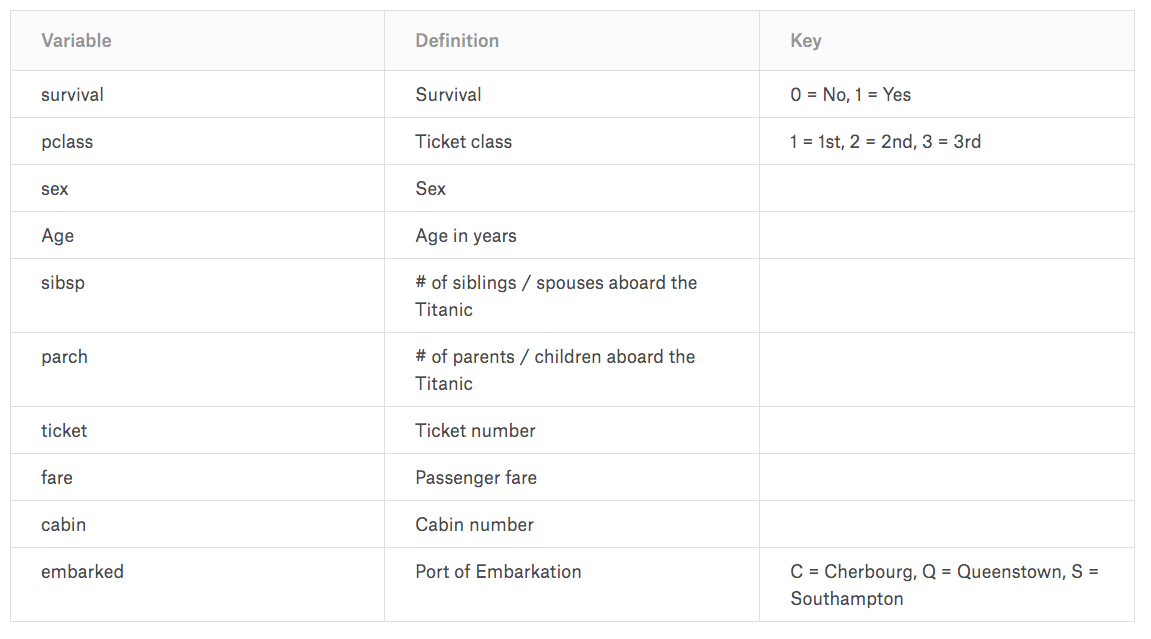

In [113]:
print train.info()
print test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

从显示结果可以看出，训练集有891个sample，Embarked有889个sample，有缺失值，Age有714个sampe，也有缺失值。后边，我们将用fillna函数来补全缺失值。

本文，我们选取可能影响生还结果的Pclass, Sex, Age等变量，作为特征。选择因变量（target）：‘Survived’。

In [114]:
selected_features = ['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch','Fare']

In [115]:
X_train = train[selected_features]

X_test = test[selected_features]

y_train = train['Survived']

In [116]:
# print X_train['Embarked'].value_counts()
# print X_test['Embarked'].value_counts()

我们使用fillna函数来补全缺失值。对于分类变量，比如Embarked，常规做法为使用占大多数比例的值填充。对于数值变量，例如age，使用其他sample的均值来填充。当然也可以删除有缺失值的sample。

In [86]:
X_train['Embarked'].fillna('S', inplace=True)

In [87]:
X_test['Embarked'].fillna('S', inplace=True)

In [88]:
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)

In [89]:
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

填充完缺失值后，我们在检查一下每个变量的sample数量。

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Embarked    891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [93]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
Embarked    418 non-null object
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


以下步骤也是数据准备的一部分，使用DictVectorizer把以上变量转换成特征向量，作为model的输入，把字符型特征进行one-hot coding处理。

In [94]:
from sklearn.feature_extraction import DictVectorizer

dict_vec = DictVectorizer(sparse=False)

In [95]:
X_train = dict_vec.fit_transform(X_train.to_dict(orient='record'))

In [96]:
dict_vec.feature_names_

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex=female',
 'Sex=male',
 'SibSp']

In [97]:
X_test = dict_vec.transform(X_test.to_dict(orient='record'))

## 3. 特征选择  
在建立一个机器学习模型时，并不是所有所有的数据属性都对模型有同等的贡献，因此也不是数据属性越多越好。在建立模型之前，要从众多的数据属性中选择对模型的输出和结果预测贡献最大的那些变量，这种对特征进行筛选的过程叫做“特征选择”。“特征选择”具有以下三方面的重要作用：1.减少过拟合 2.更加模型准确性 3.加快模型训练时间。本教程中，我们只选择了'Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch','Fare'作为特征，是假设驱动的特征选择过程，另外还可以使用sklearn中的特征选择算法，进行特征选择，包括：循环特征消减(Recursive Feature Elimination)和特征重要性评级 (feature importance ranking)。  

### 关于特征选择的具体内容，请参见博客：[scikit-learn系列之特征选择](https://www.jianshu.com/p/8f6f94f1d275)。

## 4. 算法筛查
算法筛查(spot checking)用来发现可以很好解决机器学习问题的算法。在着手做之前，你永远也不知道哪种算法最契合你的数据。因此你必须尝试大量的算法，找出一个最有潜力的算法，继续深入挖掘。titanic问题，这是一个分类问题。分类算法主要有：Logistic Regression；
Linear Discriminant Analysis； K-Nearest Neighbors； Naive Bayes； Classification and Regression Trees； Support Vector Machines。使用交叉验证以及准确率，ROC曲线下面积等衡量model表现的指标，从众多算法中挑选出表现做好的算法。这里我们只使用经典的SVM算法为例子，做分类预测。  

### 关于分类算法筛查的具体内容，请参见博客：[scikit-learn系列之分类算法筛查](https://www.jianshu.com/p/61efd1842afc)。
### 关于回归算法筛查的具体内容，请参见博客：[scikit-learn系列之回归算法筛查](https://www.jianshu.com/p/c3f3ab69f5ca)

In [98]:
from sklearn.svm import SVC

svc = SVC()

from sklearn.cross_validation import cross_val_score

cross_val_score(svc, X_train, y_train, cv=5).mean()

0.7139825454901381

使用'Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch','Fare'作为特征，svc算法和默认参数训练模型，我们只获得71.4%的准确率，看来还有很大的提升空间。提高准确率的方法包括而不限于：  
1. 尝试其他算法。 
2. 调整模型参数。
3. 算法集成（稍后介绍）。

## 5. 算法集成
算法集成可以提升模型的准确率。在scikit-learn中有Bagging，Boosting和Voting三种集成算法。
1. Bagging：使用训练样本的不同子集来建立多个模型（一般是相同类型）  
2. Boosting：建立多个模型的序列（一般是相同类型），后一个模型用来修正前一个模型的预测错误。
3. Voting：建立多个模型（一般是不同类型）和简单的统计量（比如均值），来进行组合预测。   

### 关于算法集成的具体内容，请参考：[scikit-learn系列之如何做算法集成](https://www.jianshu.com/p/15a6611f1896)  

以Bagging中的RandomForest为例： 

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

from sklearn.cross_validation import cross_val_score

cross_val_score(rfc, X_train, y_train, cv=5).mean()

使用RandomForest集成算法，准确率从71.4->81.4%，获得很大提升，体现出了算法集成的优越性。接下来我们使用Boosting中的xgboost，来看看效果。

In [104]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
cross_val_score(xgbc, X_train, y_train, cv=5).mean()

使用xgboost准确率提升到了81.8%，这时候，我们可以去预测测试集了，获得能够提交Kaggle的csv结果文件。

In [106]:
rfc.fit(X_train,y_train)
rfc_y_predict = rfc.predict(X_test)

rfc_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': rfc_y_predict})
rfc_submission.to_csv('../Datasets/Titanic/rfc_submission.csv', index=False)

In [107]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
xgbc_y_predict = xgbc.predict(X_test)
xgbc_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': xgbc_y_predict})
xgbc_submission.to_csv('../Datasets/Titanic/xgbc_submission.csv', index=False)

## 6. 调整算法参数  
机器学习的模型都是参数化的，以便于其针对特定的问题进行调整。一个模型有很多参数，寻找这些参数的最佳组合其实是一个搜索问题。调整参数是呈现机器学习结果前的最后一步。有时这一过程也叫超参最优化,其中算法的参数叫做超参，而具体机器学习模型的系数叫做参数。最优化的意思暗示这是一个搜索问题。既然作为一个搜索问题，你就可以使用不同的搜索策略，为一个已知问题，找到一个好而且稳定的参数或者参数集合。sklearn提供了调整参数的方法。包括 ‘网格搜索调整参数’和‘随机搜索调整参数’。这里我们以网格搜索为例：  
### 关于参数调整的具体内容，请参考：[scikit-learn系列之如何调整算法参数](https://www.jianshu.com/p/912d4f722e4c)。


In [109]:
from sklearn.grid_search import GridSearchCV

params = {'max_depth':range(2, 7), 'n_estimators':range(100, 1100, 200), 'learning_rate':[0.05, 0.1, 0.25, 0.5, 1.0]}

xgbc_best = XGBClassifier()

gs = GridSearchCV(xgbc_best, params, n_jobs=-1, cv=5, verbose=1)

gs.fit(X_train, y_train)


Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 618 out of 625 | elapsed:   53.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:   54.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500, 700, 900], 'learning_rate': [0.05, 0.1, 0.25, 0.5, 1.0], 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [110]:
print gs.best_score_
print gs.best_params_

xgbc_best_y_predict = gs.predict(X_test)

0.835016835017
{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}


我们可以发现，通过调参，我们进一步提升了将近2个百分点，你在kaggle上的名词可能又会因此升个几位。最后把结果保存下来。

In [111]:
xgbc_best_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': xgbc_best_y_predict})

In [112]:
xgbc_best_submission.to_csv('../Datasets/Titanic/xgbc_best_submission.csv', index=False)

## 7. 存储和导入机器学习模型
找到一个准确的机器学习模型，你的项目并没有完成。你可以使用scikit-learn来存储和导入机器学习模型。你可以把你的模型保持到文件中，然后再导入内存进行预测。除了pickle.dump，还有joblib.dump可以完成模型参数的存储。  
### 具体关于存储和导入模型的内容，请参考：[scikit-learn系列之如何存储和导入机器学习模型](https://www.jianshu.com/p/113f33ab6f31)。

In [79]:
import cPickle as pickle
filename = 'xgbc_best_ne100_lr01_md5.pkl'
pickle.dump(gs, open(filename, 'wb'))

还可以使用pickle.load导入模型。

In [80]:
xgbc_best_ne100_lr01_md5 = pickle.load(open(filename, 'rb'))
result = xgbc_best_ne100_lr01_md5.best_score_
print(result)

0.835016835017


## 8. 小节
**在心理学和神经影像的具体机器学习实践中，我们的数据输入特征可能是：被试的人格问卷数据（比如大五人格，哈哈哈），预测的target是大选倾向。或者是大脑每个voxel的激活数据，以此来预测大脑是在加工面孔还是景物等。总之机器学习算法适用于各种各样的分类和预测问题。只有你想不到的，没有机器学习做不到的。最为重要的还是找到合适的心理学和神经科学问题，针对于具体的数据才会有的放矢。做一个预告，下一期机器学习的原创文章很可能是：[如何使用Facebook的点赞数据，进行大五人格预测，进一步预测和改变大选结果](https://www.liip.ch/en/blog/the-facebook-scandal-or-how-to-predict-psychological-traits-from-facebook-likes)。是不是很劲爆，敬请期待。**